In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

stock_df = pd.read_csv('indexData.csv')
stock_df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


### Data preprocessing

In [64]:
stock_NYA_df = stock_df[stock_df['Index'] == 'NYA']
stock_NYA_df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [65]:
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13948 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.7+ KB


In [66]:
stock_NYA_df = stock_NYA_df.dropna()
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.6+ KB


In [67]:
stock_NYA_df['Date'] = pd.to_datetime(stock_NYA_df['Date'])
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      13947 non-null  object        
 1   Date       13947 non-null  datetime64[ns]
 2   Open       13947 non-null  float64       
 3   High       13947 non-null  float64       
 4   Low        13947 non-null  float64       
 5   Close      13947 non-null  float64       
 6   Adj Close  13947 non-null  float64       
 7   Volume     13947 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 980.6+ KB


/tmp/ipykernel_6665/3815177697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_NYA_df['Date'] = pd.to_datetime(stock_NYA_df['Date'])


In [68]:
stock_NYA_df['day_difference'] = stock_NYA_df['Date'].diff().dt.days
stock_NYA_df

/tmp/ipykernel_6665/761583660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_NYA_df['day_difference'] = stock_NYA_df['Date'].diff().dt.days


,Index,Date,Open,High,Low,Close,Adj Close,Volume,day_difference
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,NaN
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,3.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,1.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,1.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09,3.0
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09,1.0
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09,1.0
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09,1.0


In [69]:
stock_NYA_df['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [70]:
data = stock_NYA_df['Adj Close']
data

0          528.690002
1          527.210022
2          527.840027
3          531.119995
4          532.070007
             ...     
13943    16464.689450
13944    16390.189450
13945    16451.960940
13946    16531.949220
13947    16555.660160
Name: Adj Close, Length: 13947, dtype: float64

In [71]:
dates = stock_NYA_df['Date']
dates

0       1965-12-31
1       1966-01-03
2       1966-01-04
3       1966-01-05
4       1966-01-06
           ...    
13943   2021-05-24
13944   2021-05-25
13945   2021-05-26
13946   2021-05-27
13947   2021-05-28
Name: Date, Length: 13947, dtype: datetime64[ns]

In [72]:
data.shape

(13947,)

In [73]:
data = np.reshape(data, (len(data), 1))
data.shape

(13947, 1)

In [74]:
data

array([[  528.690002],
       [  527.210022],
       [  527.840027],
       ...,
       [16451.96094 ],
       [16531.94922 ],
       [16555.66016 ]])

In [75]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.01113857],
       [0.01104745],
       [0.01108624],
       ...,
       [0.991475  ],
       [0.99639958],
       [0.99785937]])

In [76]:
window_size = 7

X, y = [], []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X[:2]

[array([0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748]),
 array([0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334])]

In [77]:
X, y = np.array(X), np.array(y)
X[:2]

array([[0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748],
       [0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334]])

In [78]:
X.shape

(13940, 7)

In [79]:
train_split = 0.8
validation_split = 0.1
test_split = 0.1

train_split_index = int(len(scaled_data) * train_split)
validation_split_index = int(len(scaled_data) * (train_split + validation_split))

X_train = X[:train_split_index]
Y_train = y[:train_split_index]
X_validation = X[train_split_index:validation_split_index]
Y_validation = y[train_split_index:validation_split_index]
X_test = X[validation_split_index:]
Y_test = y[validation_split_index:]

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_validation))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 11157
Rozmiar zbioru walidacyjnego: 1395
Rozmiar zbioru testowego: 1388


In [80]:
# indices = np.arange(len(Y_train))
# np.random.shuffle(indices)
# X_train = X_train[indices]
# Y_train = Y_train[indices]

In [81]:
dates = dates[7:]
print(len(dates))

13940


In [82]:
X_train[:2]

array([[0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748],
       [0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334]])

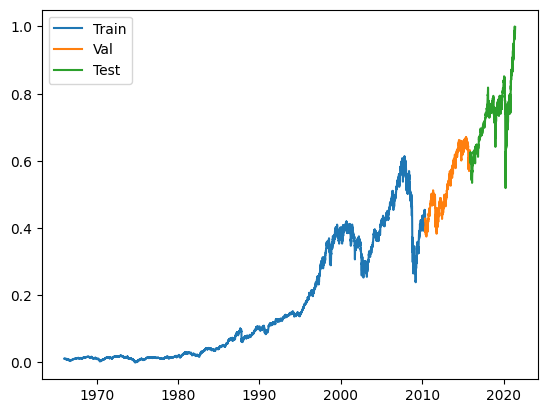

In [83]:
plt.plot(dates[:train_split_index], Y_train)
plt.plot(dates[train_split_index:validation_split_index],Y_validation)
plt.plot(dates[validation_split_index:], Y_test)
plt.legend(['Train', 'Val', 'Test'])

### Creating a model

In [84]:
model_lstm1 = tf.keras.models.Sequential()
model_lstm1.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm1.add(tf.keras.layers.Dropout(0.2))
model_lstm1.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model_lstm1.add(tf.keras.layers.Dropout(0.2))
model_lstm1.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model_lstm1.add(tf.keras.layers.Dropout(0.2))
model_lstm1.add(tf.keras.layers.LSTM(units=50))
model_lstm1.add(tf.keras.layers.Dropout(0.2))
model_lstm1.add(tf.keras.layers.Dense(units=1))


model_lstm1.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 50)             10400     
                                                                 
 dropout_15 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 7, 50)             20200     
                                                                 
 dropout_16 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_14 (LSTM)              (None, 7, 50)             20200     
                                                                 
 dropout_17 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

### Traning a model

In [85]:
history = model_lstm1.fit(X_train, Y_train, epochs=30, batch_size=128, validation_data=(X_validation, Y_validation))

Epoch 1/30
88/88 [==============================] - 10s 36ms/step - loss: 0.0066 - mae: 0.0473 - val_loss: 3.4932e-04 - val_mae: 0.0164
Epoch 2/30
88/88 [==============================] - 2s 25ms/step - loss: 6.2564e-04 - mae: 0.0146 - val_loss: 4.2005e-04 - val_mae: 0.0176
Epoch 3/30
88/88 [==============================] - 2s 26ms/step - loss: 5.5727e-04 - mae: 0.0141 - val_loss: 0.0013 - val_mae: 0.0329
Epoch 4/30
88/88 [==============================] - 2s 26ms/step - loss: 4.8700e-04 - mae: 0.0135 - val_loss: 1.5264e-04 - val_mae: 0.0094
Epoch 5/30
88/88 [==============================] - 2s 27ms/step - loss: 4.3669e-04 - mae: 0.0130 - val_loss: 3.2591e-04 - val_mae: 0.0152
Epoch 6/30
88/88 [==============================] - 2s 27ms/step - loss: 4.1198e-04 - mae: 0.0127 - val_loss: 2.0058e-04 - val_mae: 0.0115
Epoch 7/30
88/88 [==============================] - 2s 26ms/step - loss: 3.8617e-04 - mae: 0.0125 - val_loss: 5.1190e-04 - val_mae: 0.0199
Epoch 8/30
88/88 [================

In [86]:
model_lstm1.evaluate(X_test, Y_test)

 1/44 [..............................] - ETA: 0s - loss: 2.2901e-04 - mae: 0.011244/44 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0456


[0.00405935337767005, 0.04557464271783829]

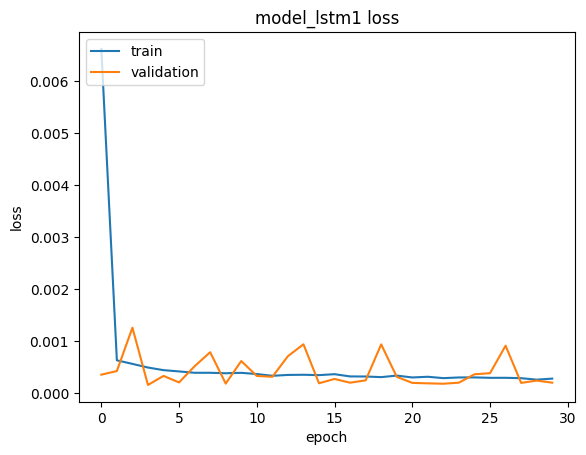

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_lstm1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 16ms/step


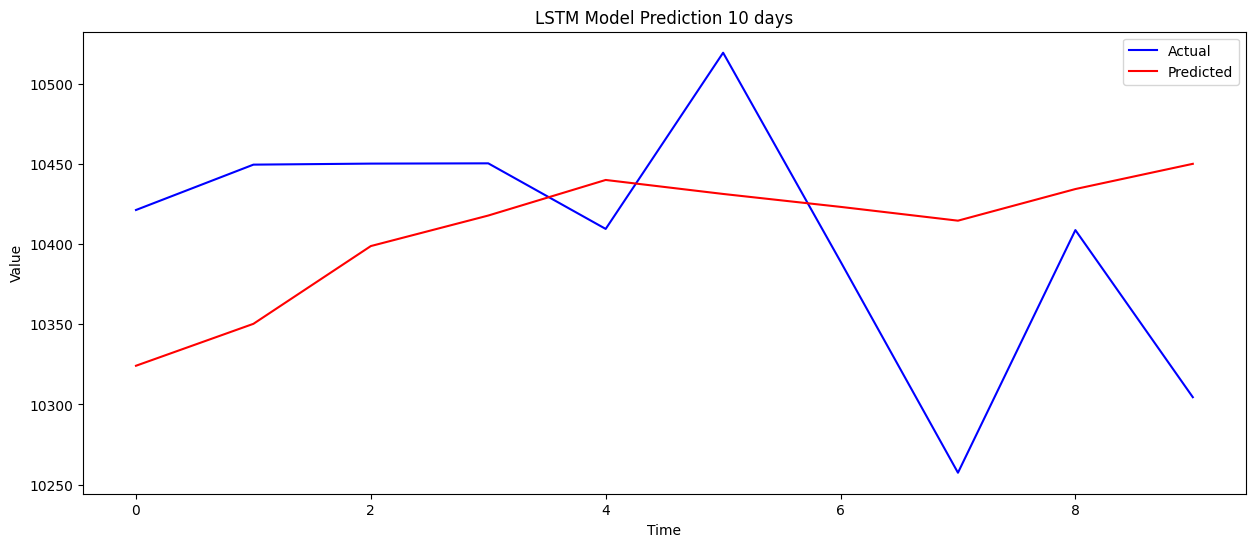

In [88]:
predictions = []
num_predictions = 10

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm1.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:num_predictions], label='Actual', color='blue')
plt.plot(predictions_actual, label='Predicted', color='red')
plt.title('LSTM Model Prediction 10 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [89]:
model_lstm2 = tf.keras.models.Sequential()
model_lstm2.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm2.add(tf.keras.layers.Dropout(0.2))
model_lstm2.add(tf.keras.layers.LSTM(units=50))
model_lstm2.add(tf.keras.layers.Dropout(0.2))
model_lstm2.add(tf.keras.layers.Dense(units=20, activation='tanh'))
model_lstm2.add(tf.keras.layers.Dropout(0.2))
model_lstm2.add(tf.keras.layers.Dense(units=1))


model_lstm2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm2.summary()

history_lstm2 = model_lstm2.fit(X_train, Y_train, epochs=30, batch_size=128, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 7, 50)             10400     
                                                                 
 dropout_19 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                1020      
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [90]:
model_lstm2.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 2.9563e-04 - mae: 0.0129


[0.00029563219868578017, 0.012851603329181671]

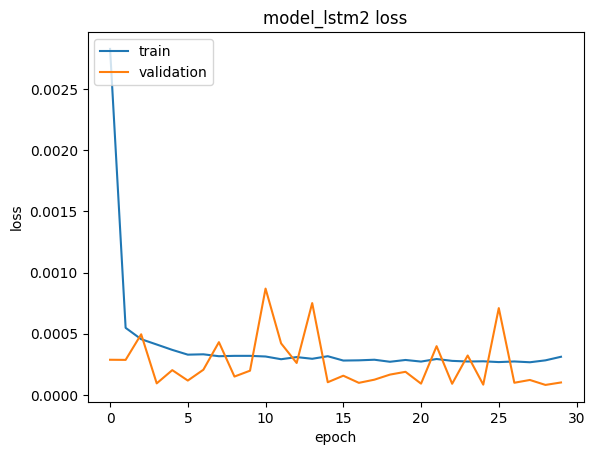

In [91]:
import matplotlib.pyplot as plt
plt.plot(history_lstm2.history['loss'])
plt.plot(history_lstm2.history['val_loss'])
plt.title('model_lstm2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 15ms/step


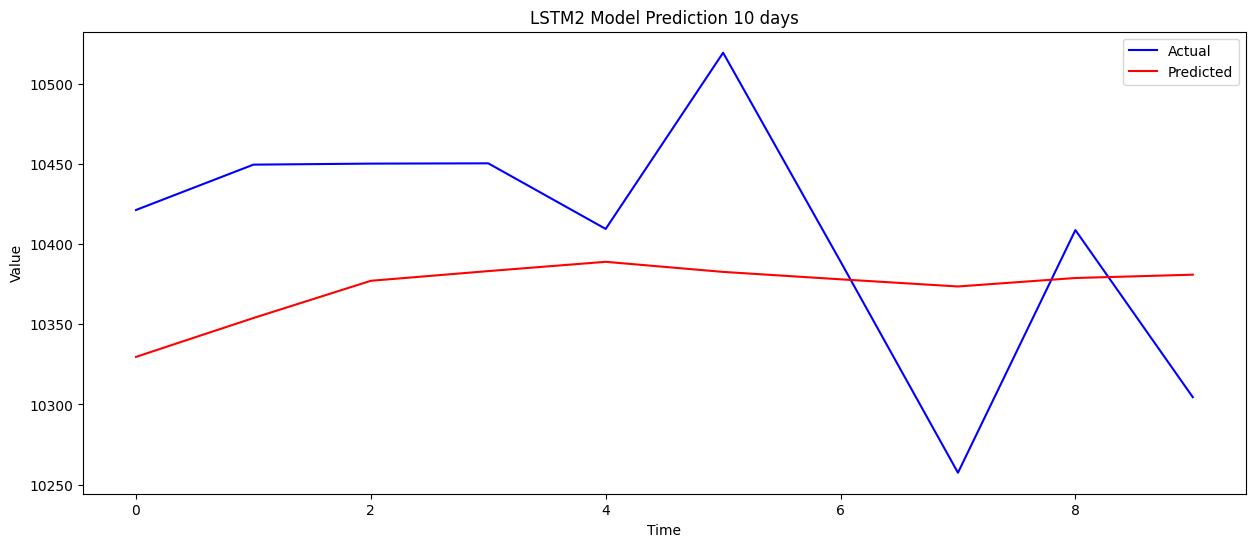

In [92]:
predictions = []
num_predictions = 10

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm2.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:num_predictions], label='Actual', color='blue')
plt.plot(predictions_actual, label='Predicted', color='red')
plt.title('LSTM2 Model Prediction 10 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [93]:
model_lstm3 = tf.keras.models.Sequential()
model_lstm3.add(tf.keras.layers.LSTM(units=5, input_shape=(X_train.shape[1], 1)))
model_lstm3.add(tf.keras.layers.Dropout(0.2))
model_lstm3.add(tf.keras.layers.Dense(units=1))


model_lstm3.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm3.summary()

history_lstm3 = model_lstm3.fit(X_train, Y_train, epochs=30, batch_size=128, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 5)                 140       
                                                                 
 dropout_22 (Dropout)        (None, 5)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
70/70 [==============================] - 3s 10ms/step - loss: 0.0295 - mae: 0.1162 - val_loss: 0.1850 - val_mae: 0.4142
Epoch 2/30
70/70 [==============================] - 0s 6ms/step - loss: 0.0190 - mae: 0.1050 - val_loss: 0.1443 - val_mae: 0.3661
Epoch 3/30
70/70 [=

In [94]:
model_lstm3.evaluate(X_test, Y_test)

 1/44 [..............................] - ETA: 0s - loss: 0.0035 - mae: 0.057644/44 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.1072


[0.012852223590016365, 0.10721449553966522]

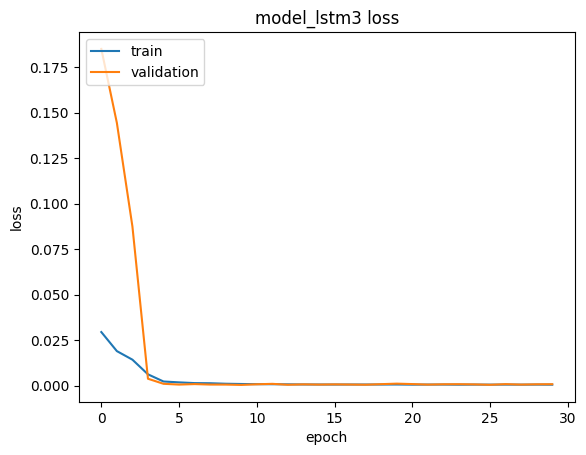

In [95]:
plt.plot(history_lstm3.history['loss'])
plt.plot(history_lstm3.history['val_loss'])
plt.title('model_lstm3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 15ms/step


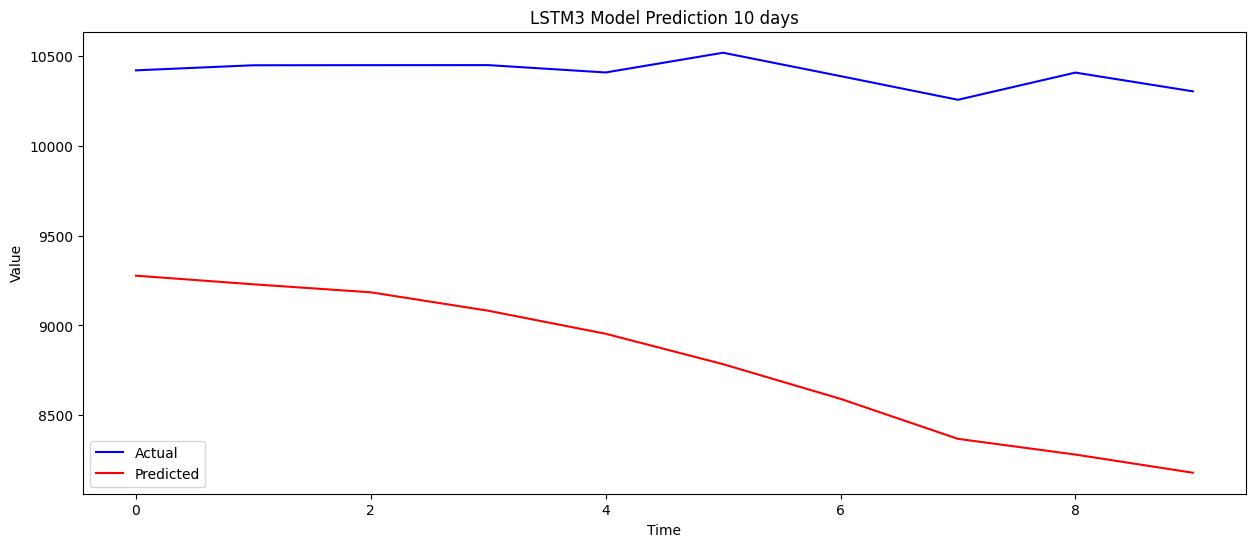

In [96]:
predictions = []
num_predictions = 10

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm3.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:num_predictions], label='Actual', color='blue')
plt.plot(predictions_actual, label='Predicted', color='red')
plt.title('LSTM3 Model Prediction 10 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [97]:
model_lstm4 = tf.keras.models.Sequential()
model_lstm4.add(tf.keras.layers.LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm4.add(tf.keras.layers.Dropout(0.2))
model_lstm4.add(tf.keras.layers.Dense(units=30, activation='tanh'))
model_lstm4.add(tf.keras.layers.Dropout(0.2))
model_lstm4.add(tf.keras.layers.Dense(units=30, activation='tanh'))
model_lstm4.add(tf.keras.layers.Dropout(0.2))
model_lstm4.add(tf.keras.layers.Dense(units=1))


model_lstm4.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm4.summary()

history_lstm4 = model_lstm4.fit(X_train, Y_train, epochs=30, batch_size=128, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 7, 60)             14880     
                                                                 
 dropout_23 (Dropout)        (None, 7, 60)             0         
                                                                 
 dense_12 (Dense)            (None, 7, 30)             1830      
                                                                 
 dropout_24 (Dropout)        (None, 7, 30)             0         
                                                                 
 dense_13 (Dense)            (None, 7, 30)             930       
                                                                 
 dropout_25 (Dropout)        (None, 7, 30)             0         
                                                                 
 dense_14 (Dense)            (None, 7, 1)             

In [98]:
model_lstm4.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4142 - mae: 0.6372


[0.414204478263855, 0.6372480988502502]

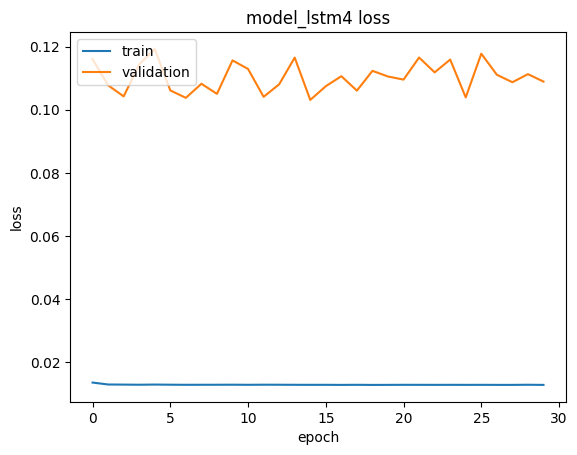

In [99]:
plt.plot(history_lstm4.history['loss'])
plt.plot(history_lstm4.history['val_loss'])
plt.title('model_lstm4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [100]:
predictions = []
num_predictions = 10

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm4.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:num_predictions], label='Actual', color='blue')
plt.plot(predictions_actual, label='Predicted', color='red')
plt.title('LSTM4 Model Prediction 10 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

1/1 [==============================] - 0s 281ms/step


ValueError: cannot reshape array of size 7 into shape (1,1,1)